### 1D Ising Model Setup

We consider a 1D chain of $N$ spins with periodic boundary conditions.

#### Hamiltonian:

$$ H = -J \sum_{i=1}^{N} s_i s_{i+1} - h \sum_{i=1}^{N} s_i $$

where:

- $s_i = \pm 1$ (spin up or down),
- $J$ is the interaction strength,
- $h$ is the external magnetic field,
- $s_{N+1} = s_1$ due to periodic boundary conditions.

#### Transfer Matrix $T$

We define a 2×2 matrix indexed by $s, s' \in \{+1, -1\}$, with matrix elements:

$$ T_{s, s'} = \exp \left[ \beta \left( J s s' + \frac{h}{2} (s + s') \right) \right] $$

Using $s, s' \in \{+1, -1\}$, the matrix looks like:

$$ T = \begin{pmatrix}
e^{\beta (J + h)} & e^{-\beta J} \\
e^{-\beta J} & e^{\beta (J - h)}
\end{pmatrix} $$

Rows and columns correspond to $s = +1, -1$ (top to bottom and left to right respectively).

#### Partition Function

With periodic boundary conditions:

$$ Z_N = \text{Tr} \left( T^N \right) = \lambda_+^N + \lambda_-^N $$

where $\lambda_+, \lambda_-$ are the eigenvalues of $T$.


In [5]:
import numpy as np

def ising_partition_function(N, J, h, beta):
    # Define the transfer matrix
    e = np.exp
    T = np.array([
        [e(beta * ( J + h)), e(-beta * J)],
        [e(-beta * J),       e(beta * ( J - h))]
    ], dtype=float)

    # Compute eigenvalues
    eigvals = np.linalg.eigvals(T)
    lambda_plus = np.max(eigvals)
    lambda_minus = np.min(eigvals)

    # Partition function Z = Tr(T^N) = λ₊^N + λ₋^N
    Z = lambda_plus**N + lambda_minus**N
    return Z, lambda_plus, lambda_minus

# Example parameters
N = 4
J = 1.0      # Interaction strength
h = 0.5      # External field
beta = 1.0   # Inverse temperature (1/kT)

Z, l1, l2 = ising_partition_function(N, J, h, beta)
print(f"Partition function Z_{N} = {Z}")
print(f"Eigenvalues: λ+ = {l1}, λ- = {l2}")


Partition function Z_4 = 427.199125947965
Eigenvalues: λ+ = 4.528681142881801, λ- = 1.6017291981563913


# Next

### Thermodynamic Quantities in 1D Ising Model

Given:

$$ Z_N = \lambda_+^N + \lambda_-^N $$

we can compute:

#### Free Energy per Spin:

$$ f = -\frac{1}{\beta N} \ln Z_N $$

#### Magnetization per Spin:

$$ m = \frac{1}{N} \frac{\partial \ln Z_N}{\partial h} \approx \frac{1}{\beta N} \frac{\partial \ln Z_N}{\partial h} $$

#### Specific Heat per Spin:

$$ C = \frac{1}{N} \frac{\partial^2 \ln Z_N}{\partial T^2} = \beta^2 \left( \langle E^2 \rangle - \langle E \rangle^2 \right) $$

We’ll compute $m$ and $C$ numerically using finite differences.

### Implementation


In [7]:
import numpy as np

def ising_transfer_matrix(J, h, beta):
    e = np.exp
    T = np.array([
        [e(beta * (J + h)), e(-beta * J)],
        [e(-beta * J),      e(beta * (J - h))]
    ])
    return T

def compute_partition_function(N, J, h, beta):
    T = ising_transfer_matrix(J, h, beta)
    eigvals = np.linalg.eigvals(T)
    λ1, λ2 = np.max(eigvals), np.min(eigvals)
    Z = λ1**N + λ2**N
    return Z, λ1, λ2

def compute_thermodynamics(N, J, h, beta):
    Z, λ1, λ2 = compute_partition_function(N, J, h, beta)
    logZ = np.log(Z)
    
    # Free energy per spin
    f = -logZ / (beta * N)
    
    # Magnetization per spin via numerical derivative
    dh = 1e-5
    Zp, _, _ = compute_partition_function(N, J, h + dh, beta)
    Zm, _, _ = compute_partition_function(N, J, h - dh, beta)
    dlnZ_dh = (np.log(Zp) - np.log(Zm)) / (2 * dh)
    m = dlnZ_dh / N

    # Specific heat per spin via numerical derivative wrt beta
    db = 1e-5
    Zp_b, _, _ = compute_partition_function(N, J, h, beta + db)
    Zm_b, _, _ = compute_partition_function(N, J, h, beta - db)
    d2lnZ_db2 = (np.log(Zp_b) - 2 * logZ + np.log(Zm_b)) / (db ** 2)
    C = (beta**2 / N) * d2lnZ_db2

    return f, m, C

# Example parameters
N = 100
J = 1.0
h = 0.1
beta = 1.0

f, m, C = compute_thermodynamics(N, J, h, beta)

print(f"Free energy per spin f = {f}")
print(f"Magnetization per spin m = {m}")
print(f"Specific heat per spin C = {C}")


Free energy per spin f = -1.1598849194217664
Magnetization per spin m = 0.5949145389436693
Specific heat per spin C = 0.6600060942218987


# 1. Varying with Temperature
This code plots free energy, magnetization, and specific heat as functions of temperature T.

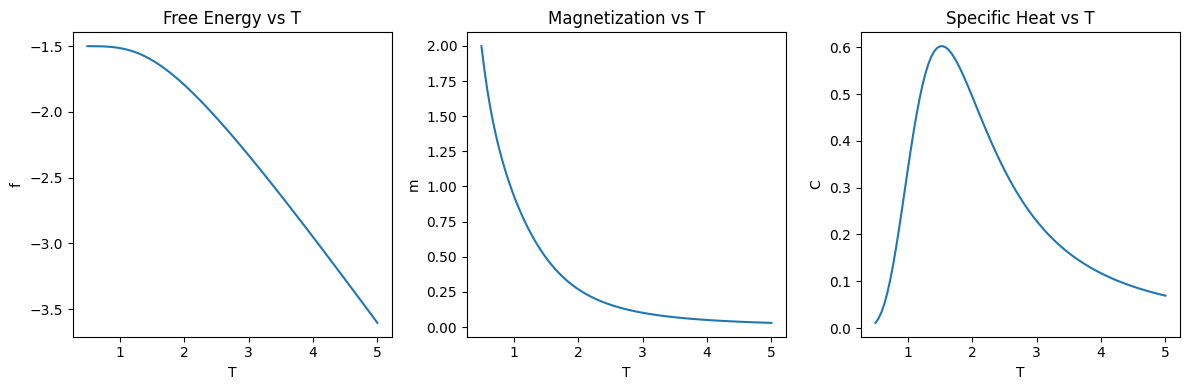

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def ising_partition(N, J, h, beta):
    e = np.exp
    T = np.array([
        [e(beta * (J + h)), e(-beta * J)],
        [e(-beta * J),      e(beta * (J - h))]
    ])
    eigvals = np.linalg.eigvals(T)
    λ1, λ2 = np.max(eigvals), np.min(eigvals)
    Z = λ1**N + λ2**N
    return Z, np.log(Z), λ1, λ2

def thermo_vs_temperature(N, J, h, T_vals):
    f_vals, m_vals, C_vals = [], [], []

    for T in T_vals:
        beta = 1.0 / T
        Z, logZ, _, _ = ising_partition(N, J, h, beta)

        # Free energy
        f = -logZ / (beta * N)

        # Magnetization
        dh = 1e-5
        Zp, _, _, _ = ising_partition(N, J, h + dh, beta)
        Zm, _, _, _ = ising_partition(N, J, h - dh, beta)
        dlnZ_dh = (np.log(Zp) - np.log(Zm)) / (2 * dh)
        m = dlnZ_dh / N

        # Specific heat
        db = 1e-5
        Zp_b, _, _, _ = ising_partition(N, J, h, beta + db)
        Zm_b, _, _, _ = ising_partition(N, J, h, beta - db)
        d2lnZ_db2 = (np.log(Zp_b) - 2 * logZ + np.log(Zm_b)) / (db ** 2)
        C = (beta**2 / N) * d2lnZ_db2

        f_vals.append(f)
        m_vals.append(m)
        C_vals.append(C)

    return f_vals, m_vals, C_vals

# Parameters
N, J, h = 4, 1.0, 0.5
T_vals = np.linspace(0.5, 5, 100)

f, m, C = thermo_vs_temperature(N, J, h, T_vals)

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(T_vals, f)
plt.title('Free Energy vs T')
plt.xlabel('T')
plt.ylabel('f')

plt.subplot(1, 3, 2)
plt.plot(T_vals, m)
plt.title('Magnetization vs T')
plt.xlabel('T')
plt.ylabel('m')

plt.subplot(1, 3, 3)
plt.plot(T_vals, C)
plt.title('Specific Heat vs T')
plt.xlabel('T')
plt.ylabel('C')

plt.tight_layout()
plt.show()


# 2. Varying with Magnetic Field
This code plots the same three quantities as functions of magnetic field h:

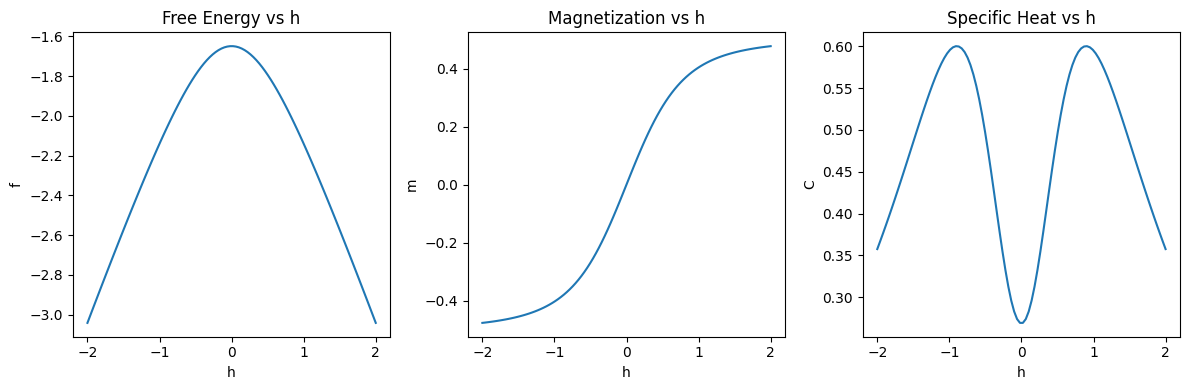

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def ising_partition(N, J, h, beta):
    e = np.exp
    T = np.array([
        [e(beta * (J + h)), e(-beta * J)],
        [e(-beta * J),      e(beta * (J - h))]
    ])
    eigvals = np.linalg.eigvals(T)
    λ1, λ2 = np.max(eigvals), np.min(eigvals)
    Z = λ1**N + λ2**N
    return Z, np.log(Z), λ1, λ2

def thermo_vs_field(N, J, beta, h_vals):
    f_vals, m_vals, C_vals = [], [], []

    for h in h_vals:
        Z, logZ, _, _ = ising_partition(N, J, h, beta)

        # Free energy
        f = -logZ / (beta * N)

        # Magnetization
        dh = 1e-5
        Zp, _, _, _ = ising_partition(N, J, h + dh, beta)
        Zm, _, _, _ = ising_partition(N, J, h - dh, beta)
        dlnZ_dh = (np.log(Zp) - np.log(Zm)) / (2 * dh)
        m = dlnZ_dh / N

        # Specific heat
        db = 1e-5
        Zp_b, _, _, _ = ising_partition(N, J, h, beta + db)
        Zm_b, _, _, _ = ising_partition(N, J, h, beta - db)
        d2lnZ_db2 = (np.log(Zp_b) - 2 * logZ + np.log(Zm_b)) / (db ** 2)
        C = (beta**2 / N) * d2lnZ_db2

        f_vals.append(f)
        m_vals.append(m)
        C_vals.append(C)

    return f_vals, m_vals, C_vals

# Parameters
N, J, T = 4, 1.0, 2.0
beta = 1.0 / T
h_vals = np.linspace(-2, 2, 100)

f, m, C = thermo_vs_field(N, J, beta, h_vals)

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(h_vals, f)
plt.title('Free Energy vs h')
plt.xlabel('h')
plt.ylabel('f')

plt.subplot(1, 3, 2)
plt.plot(h_vals, m)
plt.title('Magnetization vs h')
plt.xlabel('h')
plt.ylabel('m')

plt.subplot(1, 3, 3)
plt.plot(h_vals, C)
plt.title('Specific Heat vs h')
plt.xlabel('h')
plt.ylabel('C')

plt.tight_layout()
plt.show()
